# DATA PREPROCESSING

In [1]:
"hello world"

'hello world'

In [5]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import random
%matplotlib inline


C:\Users\aksha\AppData\Local\Temp\ipykernel_21968\267954674.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.random.normal(0,1,1000))


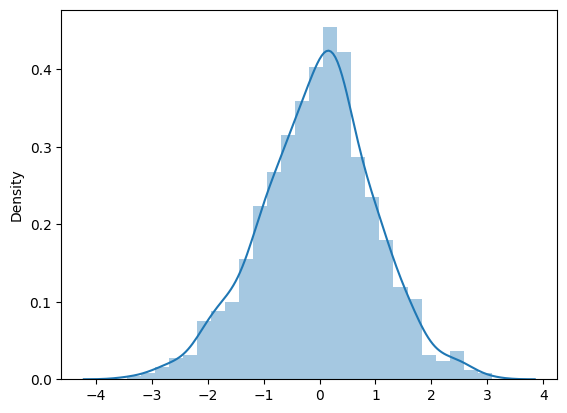

In [6]:
sns.distplot(np.random.normal(0,1,1000))
plt.show()

C:\Users\aksha\AppData\Local\Temp\ipykernel_21968\2318173593.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.random.normal(0,1,10000))


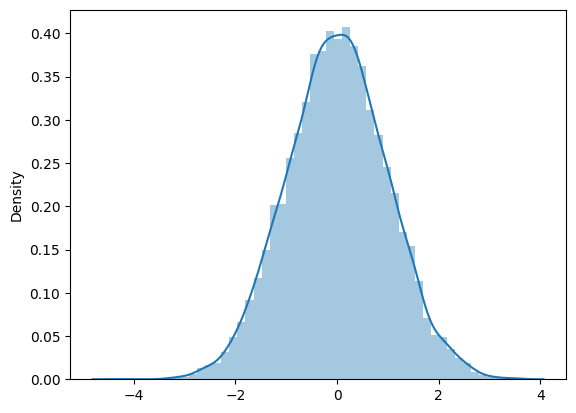

In [8]:
sns.distplot(np.random.normal(0,1,10000))
plt.show()